In [10]:
import keras as K
from keras.datasets import fashion_mnist
import numpy as np
import tensorflow as tf

In [11]:
num_features = 784
batch_size = 32
class_names = ['Футболка/топ', 'Штани', 'Светр', 'Сукня', 'Пальто',
               'Сандалі', 'Сорочка', 'Кросівки', 'Сумка', 'Черевики']

In [12]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train, X_test = np.array(X_train, np.float32), np.array(X_test, np.float32)

X_train, X_test = X_train / 255., X_test / 255.

In [13]:
model = K.Sequential([
    K.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.MaxPooling2D((2, 2)),
    K.layers.Conv2D(64, (3, 3), activation='relu'),
    K.layers.Flatten(),
    K.layers.Dense(128, activation='relu'),
    K.layers.Dense(10)
])

In [14]:
model.compile(
    loss=K.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer=K.optimizers.Adam(0.001),
    metrics=[K.metrics.SparseCategoricalAccuracy()]
)

In [15]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

In [16]:
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), batch_size=batch_size)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.4943 - sparse_categorical_accuracy: 0.8174 - val_loss: 0.3599 - val_sparse_categorical_accuracy: 0.8687
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.3161 - sparse_categorical_accuracy: 0.8845 - val_loss: 0.3082 - val_sparse_categorical_accuracy: 0.8881
Epoch 3/10
1875/1875 [==============================] - 8s 5ms/step - loss: 0.2698 - sparse_categorical_accuracy: 0.8993 - val_loss: 0.2859 - val_sparse_categorical_accuracy: 0.8986
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2394 - sparse_categorical_accuracy: 0.9105 - val_loss: 0.2749 - val_sparse_categorical_accuracy: 0.9001
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2173 - sparse_categorical_accuracy: 0.9196 - val_loss: 0.2685 - val_sparse_categorical_accuracy: 0.9029
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1980 - spar

In [17]:
import matplotlib.pyplot as plt

def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()


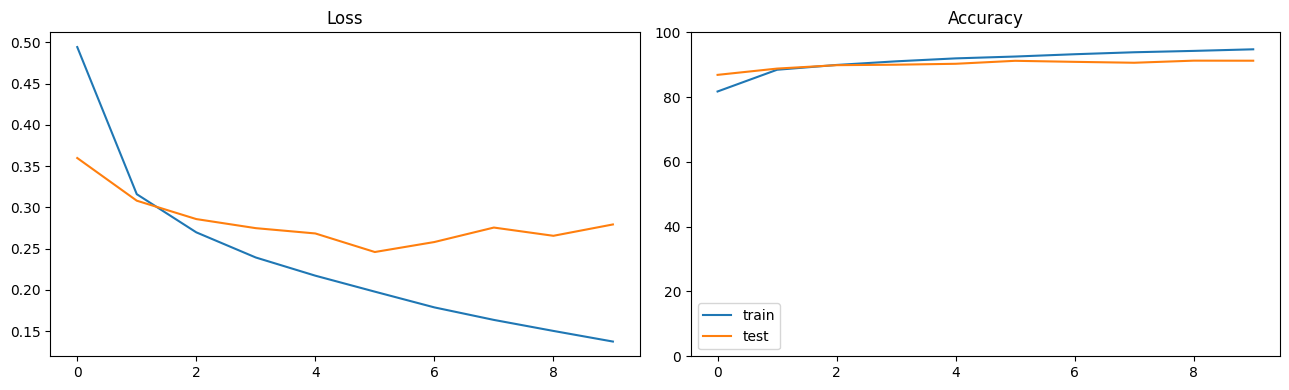

In [18]:
plot_history(history)